# Lab 3: Data Cleaning and Seaborn

** If you are not attending lab, this assignment is due 09/12/2017 at 11:59pm (graded on accuracy) **

** If you are attending lab, you do not need to submit the assignment; you just need to get checked off by your TA. **

In this lab, you will be working on the Berkeley Police Department - Calls Data https://data.cityofberkeley.info/Public-Safety/Berkeley-PD-Calls-for-Service/k2nh-s5h5

The data contains some interesting information but you may need to clean it a bit first.

You may find the material in the lecture helpful http://www.ds100.org/fa17/assets/notebooks/04-lec/EDA_and_cleaning.html

## Setup
import the libraries and setup the okpy environment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()


# These lines load the tests.
# !pip install -U okpy

from client.api.notebook import Notebook
ok = Notebook('lab03.ok')

Assignment: Lab 03
OK, version v1.12.10



In [2]:
import os
auth_refresh = os.path.join(os.path.expanduser('~'), '.config', 'ok', 'auth_refresh')
if os.path.exists(auth_refresh):
    os.remove(auth_refresh)
ok.auth(force=True)


Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.

Paste your code here: 5vftPvpJAqgvLyVaWlt2wrCwdN4An9
Successfully logged in as sungbin.andy.kang@berkeley.edu


## Loading Data and simple exploration

In [3]:
calls = pd.read_csv("data/Berkeley_PD_-_Calls_for_Service.csv")
calls.head()

CASENO            OFFENSE                 EVENTDT EVENTTM  \
0  17091420      BURGLARY AUTO  07/23/2017 12:00:00 AM   06:00   
1  17020462  THEFT FROM PERSON  04/13/2017 12:00:00 AM   08:45   
2  17050275      BURGLARY AUTO  08/24/2017 12:00:00 AM   18:30   
3  17019145         GUN/WEAPON  04/06/2017 12:00:00 AM   17:30   
4  17044993     VEHICLE STOLEN  08/01/2017 12:00:00 AM   18:00   

              CVLEGEND  CVDOW                InDbDate  \
0   BURGLARY - VEHICLE      0  08/29/2017 08:28:05 AM   
1              LARCENY      4  08/29/2017 08:28:00 AM   
2   BURGLARY - VEHICLE      4  08/29/2017 08:28:06 AM   
3      WEAPONS OFFENSE      4  08/29/2017 08:27:59 AM   
4  MOTOR VEHICLE THEFT      2  08/29/2017 08:28:05 AM   

                                      Block_Location             BLKADDR  \
0  2500 LE CONTE AVE\nBerkeley, CA\n(37.876965, -...   2500 LE CONTE AVE   
1  2200 SHATTUCK AVE\nBerkeley, CA\n(37.869363, -...   2200 SHATTUCK AVE   
2  200 UNIVERSITY AVE\nBerkeley, CA\n(37.865491, ...  200 UNIVERSITY AVE   
3  1900 SEVENTH ST\nBerkeley, CA\n(37.869318, -12...     1900 SEVENTH ST   
4  100 PARKSIDE DR\nBerkeley, CA\n(37.854247, -12...     100 PARKSIDE DR   

       City State  
0  Berkeley    CA  
1  Berkeley    CA  
2  Berkeley    CA  
3  Berkeley    CA  
4  Berkeley    CA

First let's check how many records we have.

In [4]:
len(calls)

5508

Then we can go over the fields to see what are their meanings. We can first check if all events happened in Berkeley

In [5]:
calls.groupby(["City","State"]).count()

CASENO  OFFENSE  EVENTDT  EVENTTM  CVLEGEND  CVDOW  InDbDate  \
City     State                                                                 
Berkeley CA       5508     5508     5508     5508      5508   5508      5508   

                Block_Location  BLKADDR  
City     State                           
Berkeley CA               5508     5481

### Question 1
It seems OFFENSE and CVLEGEND are both about the type of event. What is the difference between the two? Try to use the `groupby` method to group the two keys.

You should be able to see that CVLEGEND is a broader category of crime. For example, there are three sub-categories in OFFENSE that correspond to LARCENY in CVLEGEND. Find them and save the results in `answer1` (should be a list of strings, you may manually type in the answer).

In [6]:
# You may use this cell for your scratch work as long as you enter
# in your final answers in the answer1 variable.

calls.groupby
answer1 = ["THEFT FELONY (OVER $950)", "THEFT FROM PERSON", "THEFT MISD. (UNDER $950)"]

In [7]:
_ = ok.grade('q01')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab03.ipynb'.
Backup... 100% complete
Backup successful for user: sungbin.andy.kang@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab03/backups/v2p4om
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



### Question 2

#### Question 2a

What are the five crime types of CVLEGEND that have the most crime events? You may need to use `value_counts` to find the answer. Save your results into `answer2a` as a list of strings

In [8]:
answer2a = ["LARCENY", "BURGLARY - VEHICLE", "VANDALISM", "DISORDERLY CONDUCT", "ASSAULT"]
calls.groupby(["CVLEGEND", "OFFENSE"]).count()
calls['CVLEGEND'].value_counts().sort_values(ascending=False)

LARCENY                   1102
BURGLARY - VEHICLE        1021
VANDALISM                  438
DISORDERLY CONDUCT         415
ASSAULT                    352
DRUG VIOLATION             328
MOTOR VEHICLE THEFT        308
BURGLARY - RESIDENTIAL     274
FRAUD                      260
ROBBERY                    187
LIQUOR LAW VIOLATION       147
LARCENY - FROM VEHICLE     140
FAMILY OFFENSE             130
BURGLARY - COMMERCIAL      104
MISSING PERSON              96
WEAPONS OFFENSE             77
SEX CRIME                   50
NOISE VIOLATION             46
ARSON                       14
ALL OTHER OFFENSES           9
RECOVERED VEHICLE            8
KIDNAPPING                   1
HOMICIDE                     1
Name: CVLEGEND, dtype: int64

In [9]:
_ = ok.grade('q02a')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab03.ipynb'.
Backup... 100% complete
Backup successful for user: sungbin.andy.kang@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab03/backups/o2g4QK
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 2b
Also we can use the `countplot` to plot the distribution of different event types of `CVLEGEND`. 

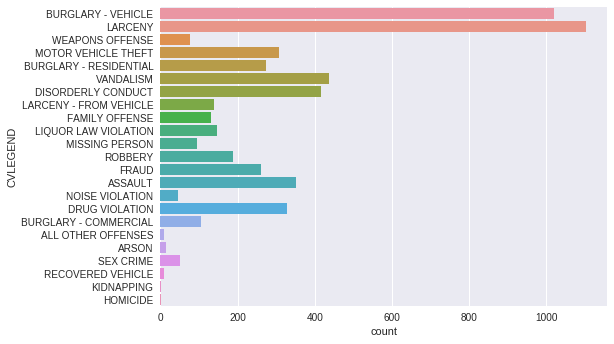

In [10]:
sns.countplot(data=calls,y='CVLEGEND')

However, `countplot` didn't sort the rows according to the count. Try to use `value_counts` and `barplot` to plot a similar graph with the rows sorted according to the count

In [11]:
calls['CVLEGEND'].value_counts().sort_values(ascending=False).index

Index(['LARCENY', 'BURGLARY - VEHICLE', 'VANDALISM', 'DISORDERLY CONDUCT',
       'ASSAULT', 'DRUG VIOLATION', 'MOTOR VEHICLE THEFT',
       'BURGLARY - RESIDENTIAL', 'FRAUD', 'ROBBERY', 'LIQUOR LAW VIOLATION',
       'LARCENY - FROM VEHICLE', 'FAMILY OFFENSE', 'BURGLARY - COMMERCIAL',
       'MISSING PERSON', 'WEAPONS OFFENSE', 'SEX CRIME', 'NOISE VIOLATION',
       'ARSON', 'ALL OTHER OFFENSES', 'RECOVERED VEHICLE', 'KIDNAPPING',
       'HOMICIDE'],
      dtype='object')

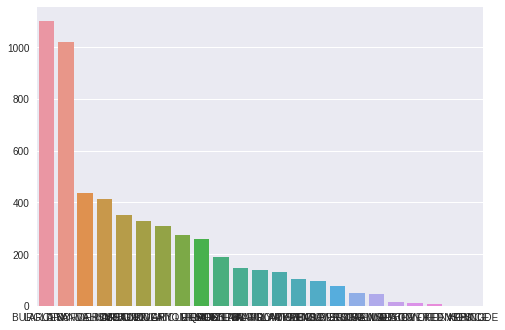

In [12]:
sns.barplot(x=calls['CVLEGEND'].value_counts().sort_values(ascending=False).index, y=calls['CVLEGEND'].value_counts().sort_values(ascending=False).values, data=calls)
sns.barplot?

### Question 3a

The CVDOW field isn't named helpfully and it is hard to see the meaning from the data alone. According to the website, CVDOW is actually indicating the day that events happend. 0->Sunday, 1->Monday ... 6->Saturday.  Add a new column `Day` into the `calls` dataframe that has the string weekday (eg. 'Sunday') for the corresponding value in CVDOW.

In [13]:
days = np.array(["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])
calls["Day"] = days[calls['CVDOW']]

In [14]:
set(calls["Day"])

{'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'}

In [15]:
_ = ok.grade('q03a')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab03.ipynb'.
Backup... 100% complete
Backup successful for user: sungbin.andy.kang@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab03/backups/zpwjK8
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



### Question 3b
We can plot the distribution of crime events on different days to see if there are some interesting findings.

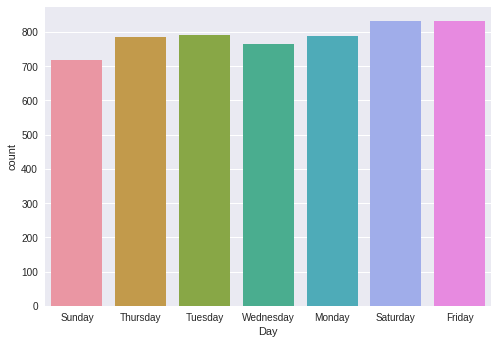

In [16]:
sns.countplot(x="Day",data=calls)

It seems Saturday and Friday have slightly more crimes than the others, while Sunday is the lowest. But the difference is not significant. We can break down into some particular types of events to see their distribution. For example, please make a `countplot` for the "NOISE VIOLATION". Which two days are the peak for "NOISE VIOLATION"? Put your results into `answer3b` as a list of strings. 

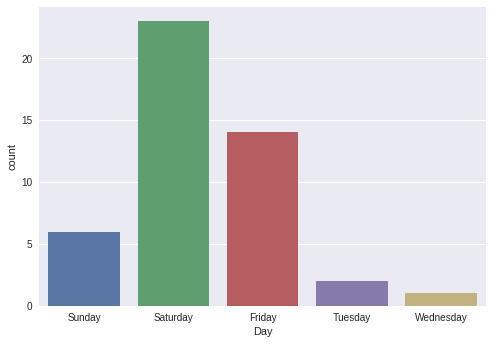

In [19]:
sns.countplot(x="Day", data=calls[(calls["CVLEGEND"] == "NOISE VIOLATION")])

5508

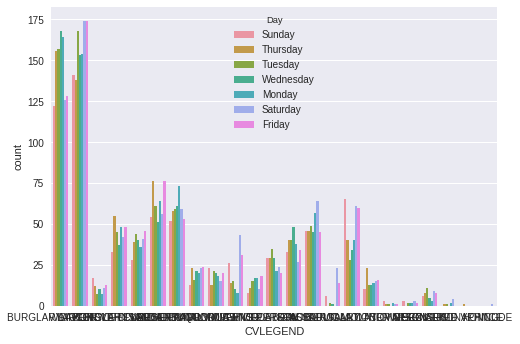

In [24]:
# TODO: make some plots here
sns.countplot(x="CVLEGEND", hue="Day", data=calls)
answer3b = ["Saturday", "Friday"]
calls["CVLEGEND"].count()

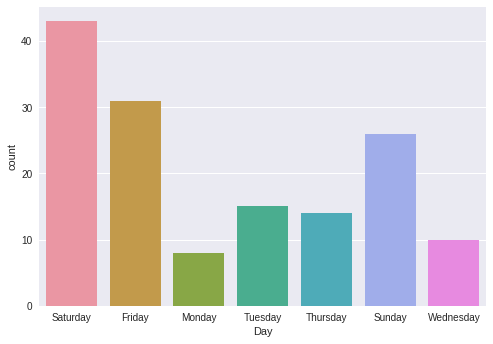

In [40]:
sns.countplot(x="Day", data=calls[(calls["CVLEGEND"] == "LIQUOR LAW VIOLATION")])

In [21]:
_ = ok.grade('q03b')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab03.ipynb'.
Backup... 100% complete
Backup successful for user: sungbin.andy.kang@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab03/backups/pYj5Z1
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



### Question 3c
There are two more CVLEGEND types that have similar distribution as "NOISE VIOLATION" (peaks are weekends), find both and put your results into the `answer3c` as a list of strings.

In [43]:
answer3c = ["LARCENY", "LIQUOR LAW VIOLATION"]

In [44]:
_ = ok.grade('q03c')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Question 3c > Suite 1 > Case 1

>>> def ascii_sum(ans):
...     return sum([sum(map(ord, s.strip())) for s in ans])
>>> ascii_sum(answer3c) == 2492
False

# Error: expected
#     True
# but got
#     False

Run only this test case with "python3 ok -q q03c --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab03.ipynb'.
Backup... 100% complete
Backup successful for user: sungbin.andy.kang@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab03/backups/1wvAvP
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



### Question 4a
Now let's look at the EVENTTM column which indicates the time for events. Since it contains hour and minute information, let's extract the hour info and create a new column named `hour` in the `calls` dataframe. You should save the hour as an int. Then plot the distribution of the `hour` column using `sns.countplot`.

In [73]:
int(calls["EVENTTM"][0][0:2])
for x in np.arange(len(calls["EVENTTM"])):
    calls["hour"][x] = int(calls["EVENTTM"][x][0:2])

/home/ksab77/anaconda3/envs/ds100/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
calls

CASENO                   OFFENSE                 EVENTDT EVENTTM  \
0     17091420             BURGLARY AUTO  07/23/2017 12:00:00 AM   06:00   
1     17020462         THEFT FROM PERSON  04/13/2017 12:00:00 AM   08:45   
2     17050275             BURGLARY AUTO  08/24/2017 12:00:00 AM   18:30   
3     17019145                GUN/WEAPON  04/06/2017 12:00:00 AM   17:30   
4     17044993            VEHICLE STOLEN  08/01/2017 12:00:00 AM   18:00   
5     17037319      BURGLARY RESIDENTIAL  06/28/2017 12:00:00 AM   12:00   
6     17030791      BURGLARY RESIDENTIAL  05/30/2017 12:00:00 AM   08:45   
7     17091066             BURGLARY AUTO  05/29/2017 12:00:00 AM   17:00   
8     17031395                 VANDALISM  06/01/2017 12:00:00 AM   20:00   
9     17041467               DISTURBANCE  07/17/2017 12:00:00 AM   01:30   
10    17090841  THEFT MISD. (UNDER $950)  04/26/2017 12:00:00 AM   15:00   
11    17038302             BURGLARY AUTO  07/02/2017 12:00:00 AM   22:00   
12    17018627           THEFT FROM AUTO  03/28/2017 12:00:00 AM   12:00   
13    17046489         DOMESTIC VIOLENCE  08/08/2017 12:00:00 AM   21:00   
14    17090794  THEFT MISD. (UNDER $950)  04/20/2017 12:00:00 AM   12:00   
15    17014095  THEFT FELONY (OVER $950)  03/13/2017 12:00:00 AM   16:45   
16    17016587           ALCOHOL OFFENSE  03/25/2017 12:00:00 AM   00:55   
17    17049346  THEFT MISD. (UNDER $950)  08/20/2017 12:00:00 AM   23:20   
18    17014188           ALCOHOL OFFENSE  03/11/2017 12:00:00 AM   18:30   
19    17045903          MISSING JUVENILE  08/04/2017 12:00:00 AM   12:00   
20    17034383               DISTURBANCE  06/15/2017 12:00:00 AM   14:30   
21    17026118             BURGLARY AUTO  05/08/2017 12:00:00 AM   19:00   
22    17090933             BURGLARY AUTO  05/10/2017 12:00:00 AM   16:30   
23    17017335                   ROBBERY  03/28/2017 12:00:00 AM   16:29   
24    17091319  THEFT MISD. (UNDER $950)  07/09/2017 12:00:00 AM   04:15   
25    17091356                 VANDALISM  07/13/2017 12:00:00 AM   21:30   
26    17091255            IDENTITY THEFT  06/29/2017 12:00:00 AM   13:10   
27    17044238               DISTURBANCE  07/30/2017 12:00:00 AM   01:16   
28    17043329  THEFT FELONY (OVER $950)  07/25/2017 12:00:00 AM   16:00   
29    17012577             BURGLARY AUTO  03/06/2017 12:00:00 AM   05:56   
...        ...                       ...                     ...     ...   
5478  17025145         DOMESTIC VIOLENCE  05/04/2017 12:00:00 AM   19:00   
5479  17048721              2ND RESPONSE  08/18/2017 12:00:00 AM   23:19   
5480  17021604            IDENTITY THEFT  03/31/2017 12:00:00 AM   00:00   
5481  17036894             BURGLARY AUTO  06/26/2017 12:00:00 AM   14:26   
5482  17038620               DISTURBANCE  07/04/2017 12:00:00 AM   17:50   
5483  17025429                 NARCOTICS  05/06/2017 12:00:00 AM   00:08   
5484  17050170  THEFT MISD. (UNDER $950)  08/24/2017 12:00:00 AM   20:50   
5485  17039033      ASSAULT/BATTERY FEL.  07/06/2017 12:00:00 AM   13:55   
5486  17019827                     ARSON  04/09/2017 12:00:00 AM   18:41   
5487  17018238      BURGLARY RESIDENTIAL  04/01/2017 12:00:00 AM   15:30   
5488  17040083      BURGLARY RESIDENTIAL  07/11/2017 12:00:00 AM   04:45   
5489  17029497  THEFT MISD. (UNDER $950)  05/24/2017 12:00:00 AM   18:20   
5490  17040953             FRAUD/FORGERY  07/02/2017 12:00:00 AM   00:00   
5491  17030294                   ROBBERY  05/27/2017 12:00:00 AM   22:48   
5492  17032287      ASSAULT/BATTERY FEL.  06/06/2017 12:00:00 AM   05:15   
5493  17041600               BRANDISHING  07/17/2017 12:00:00 AM   18:38   
5494  17029206     ASSAULT/BATTERY MISD.  05/23/2017 12:00:00 AM   13:25   
5495  17049877             BURGLARY AUTO  08/23/2017 12:00:00 AM   14:40   
5496  17091181             BURGLARY AUTO  06/21/2017 12:00:00 AM   13:45   
5497  17033201               DISTURBANCE  06/09/2017 12:00:00 AM   22:34   
5498  17015458                 NARCOTICS  03/20/2017 12:

In [75]:
_ = ok.grade('q04a')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab03.ipynb'.
Submit... 0.0% complete
Could not submit: Late Submission of cal/ds100/fa17/lab03



### Question 4b

Now we can plot the hour distribution for each type of crime in CVLEGEND. Make a plot for "NOISE VIOLATION" and find out which 3 hours contain most of such events. Put your results into `answer4b` as a list of integers.

In [85]:

answer4b = [0, 23, 22]
calls[(calls["CVLEGEND"] == "NOISE VIOLATION")].groupby("hour").count()

CASENO  OFFENSE  EVENTDT  EVENTTM  CVLEGEND  CVDOW  InDbDate  \
hour                                                                 
0         15       15       15       15        15     15        15   
1          3        3        3        3         3      3         3   
6          2        2        2        2         2      2         2   
19         1        1        1        1         1      1         1   
22        12       12       12       12        12     12        12   
23        13       13       13       13        13     13        13   

      Block_Location  BLKADDR  City  State  Day  road  
hour                                                   
0                 15       15    15     15   15    15  
1                  3        3     3      3    3     3  
6                  2        2     2      2    2     2  
19                 1        1     1      1    1     1  
22                12       12    12     12   12    12  
23                13       13    13     13   13    13

In [86]:
_ = ok.grade('q04b')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab03.ipynb'.
Submit... 0.0% complete
Could not submit: Late Submission of cal/ds100/fa17/lab03
Backup... 100% complete



### Question 4c
Besides simple BarChart, another useful chart is the box plot. Use `sns.boxplot` to make a vertical boxplot of the hour distribution for each `CVLEGEND`. Each crime category should appear on the y-axis.

AttributeError: 'numpy.ndarray' object has no attribute 'find'

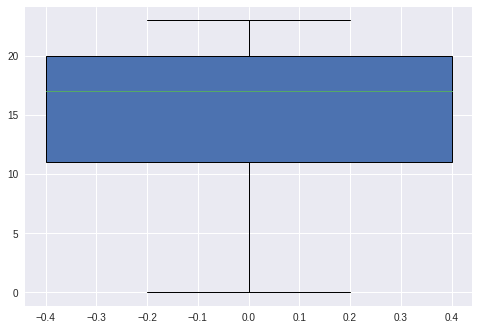

In [95]:
sns.boxplot(x="CVLEGEND", y="hour", data=calls)

### Question 5
Now we turn to the location info of the dataset. The `BLKADDR` column contains information about where the events happened. Let's see if we can find out which road has the most crimes.

First we need to extract the road name from the address. So let's look at the format of the address to see if there are any patterns there.


In [96]:
calls["BLKADDR"].head(20)

0                  2500 LE CONTE AVE
1                  2200 SHATTUCK AVE
2                 200 UNIVERSITY AVE
3                    1900 SEVENTH ST
4                    100 PARKSIDE DR
5                     1500 PRINCE ST
6                       300 MENLO PL
7                  2317 SHATTUCK AVE
8           ACTON STREET & PARKER ST
9                    2100 SEVENTH ST
10                  2500 COLLEGE AVE
11    BOWDITCH STREET & CHANNING WAY
12                 2000 FRANCISCO ST
13                    2100 ASHBY AVE
14                   2100 EMERSON ST
15     SHATTUCK AVENUE & ALLSTON WAY
16      UNIVERSITY AVENUE & GRANT ST
17                 2900 CHANNING WAY
18                   2500 DURANT AVE
19                 1200 FRANCISCO ST
Name: BLKADDR, dtype: object

From the samples, we can find out two patterns for the road name: "NUMBER ROADNAME" or "ROAD1 & ROAD2". We can start from here to extract the name of the roads.

### Question 5a
Write a script to create a new column `road` in `calls` to store the road name of the event. For the "ROAD1 & ROAD2" format just use ROAD1.

HINT 1: You should ignore N/A values (leave them unchanged in your result).

HINT 2: Consider using `apply` for this problem if you can't figure out how to use the `str` methods of pandas.

In [28]:
calls["road"] = calls['BLKADDR'].str.replace('^\d+ ', '').str.split(' &').str.get(0)

In [29]:
_ = ok.grade('q05a')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab03.ipynb'.
Backup... 100% complete
Backup successful for user: sungbin.andy.kang@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/lab03/backups/ERVoyW
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



### Question 5b
After you successfully extract the road name. Let's look at the distribution and find out what may be the most dangerous roads! Use the above methods (`countplot`, `value_counts`) to find out the top 5 roads that has the most crimes. Save you results into `answer5b` as a list of strings.

In [97]:
calls["road"].value_counts()

SHATTUCK AVE                   355
UNIVERSITY AVE                 267
SAN PABLO AVE                  155
TELEGRAPH AVE                  153
DURANT AVE                     141
DWIGHT WAY                     120
FOURTH ST                      113
BANCROFT WAY                   104
ALLSTON WAY                    103
CHANNING WAY                   101
ADELINE ST                      89
ASHBY AVE                       87
COLLEGE AVE                     82
M L KING JR WAY                 82
UNIVERSITY AVENUE               66
MILVIA ST                       59
HEARST AVE                      58
GILMAN ST                       57
OREGON ST                       57
SHATTUCK AVENUE                 57
CENTER ST                       53
OXFORD ST                       53
HASTE ST                        51
KITTREDGE ST                    48
PARKER ST                       46
BERKELEY WAY                    45
SACRAMENTO ST                   44
SIXTH ST                        42
DELAWARE ST         

In [99]:
answer5b=["SHATTUCK AVE", "UNIVERSITY AVE", "SAN PABLO AVE", "TELEGRAPH AVE", "DURANT AVE"]

In [100]:
_ = ok.grade('q05b')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab03.ipynb'.
Submit... 0.0% complete
Could not submit: Late Submission of cal/ds100/fa17/lab03
Backup... 100% complete



### Question 5c
If we look carefully into the road names, we may find out that there are "SHATTUCK AVE" and "SHATTUCK AVENUE". They refer to the same thing with different names. This is a very common problem for data analysis. And we can simply replace all the "AVENUE" with "AVE" in this case. But let's first find out all the context where "AVENUE" appears to make sure we're doing the right things.

In [101]:
calls['road'][
    (~calls['road'].isnull())
    & (calls['road'].str.contains('AVENUE'))
].value_counts()

UNIVERSITY AVENUE        66
SHATTUCK AVENUE          57
DURANT AVENUE            29
TELEGRAPH AVENUE         28
SAN PABLO AVENUE         27
ASHBY AVENUE             22
HEARST AVENUE            20
COLLEGE AVENUE           13
ALCATRAZ AVENUE          11
MARIN AVENUE              5
HILLEGASS AVENUE          5
EUCLID AVENUE             4
BENVENUE AVENUE           3
PIEDMONT AVENUE           3
COLUSA AVENUE             3
STANFORD AVENUE           2
STANNAGE AVENUE           2
SAN PABLO AVENUE 301      2
BONITA AVENUE             2
LA LOMA AVENUE            2
MCGEE AVENUE              1
MARKET AVENUE             1
PERALTA AVENUE            1
HEARST AVENUE E           1
SAN PABLO AVENUE 409      1
SOLANO AVENUE             1
POSEN AVENUE              1
UNIVERSITY AVENUE 100     1
CRAGMONT AVENUE           1
Name: road, dtype: int64

The results looks good, except for that some names have a numerical suffix. But let's not worry about them for now.

Create a new column in `calls` called `road_ave` that has all the values in the `road` column where "AVENUE" is replaced with "AVE".

In [102]:
calls["road_ave"] = calls["road"].str.replace("AVENUE", "AVE")

In [103]:
_ = ok.grade('q05c')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab03.ipynb'.
Submit... 0.0% complete
Could not submit: Late Submission of cal/ds100/fa17/lab03
Backup... 100% complete



## Submission

Congrats! You are finished with this assignment. For convenience, we've included a cell below that runs all the OkPy tests.

In [104]:
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("ok_tests") if q.startswith('q')]

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running t

Now, run the cell below to submit your assignment to OkPy. The autograder should email you shortly with your autograded score. The autograder will only run once every 30 minutes.

**If you're failing tests on the autograder but pass them locally**, you should simulate the autograder by doing the following:

1. In the top menu, click Kernel -> Restart and Run all.
2. Run the cell above to run each OkPy test.

**You must make sure that you pass all the tests when running steps 1 and 2 in order.** If you are still failing autograder tests, you should double check your results.

In [ ]:
_ = ok.submit()

<IPython.core.display.Javascript object>